## ****** Charts and Tensorboard plots are visible in the pdf version submitted ******     Assignment 5 - RNN, LSTM and GRU models ##

In [256]:
from sklearn. ensemble import VotingClassifier

In [162]:
import os

In [65]:
import keras
from keras.optimizers import SGD

In [66]:
import re
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [67]:
import tensorflow as tf
from tensorflow.keras import layers

In [68]:
import datetime

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
from keras import optimizers

In [71]:
import numpy as np

### Task 1 - Load and preprocess the data ###

In [72]:
import pandas as pd

# Read train data
df = pd.read_csv('data/sst_train.txt', sep='\t', header=None, names=['truth', 'text'])

In [73]:
# Read dev data
dev = pd.read_csv('data/sst_dev.txt', sep='\t', header=None, names=['truth', 'text'])

In [74]:
# Read test data
test = pd.read_csv('data/sst_test.txt', sep='\t', header=None, names=['truth', 'text'])

In [75]:
df['truth'] = df['truth'].str.replace('__label__', '')

In [76]:
dev['truth'] = dev['truth'].str.replace('__label__', '')

In [77]:
test['truth'] = test['truth'].str.replace('__label__', '')

In [78]:
df['truth'] = df['truth'].astype(int).astype('category')

In [79]:
dev['truth'] = dev['truth'].astype(int).astype('category')

In [80]:
test['truth'] = test['truth'].astype(int).astype('category')

In [81]:
dev.head()

,truth,text
0,4,It 's a lovely film with lovely performances b...
1,3,"No one goes unindicted here , which is probabl..."
2,4,And if you 're not nearly moved to tears by a ...
3,5,"A warm , funny , engaging film ."
4,5,Uses sharp humor and insight into human nature...


In [82]:
test.head()

,truth,text
0,3,Effective but too-tepid biopic
1,4,If you sometimes like to go to the movies to h...
2,5,"Emerges as something rare , an issue movie tha..."
3,3,The film provides some great insight into the ...
4,5,Offers that rare combination of entertainment ...


In [83]:
df.head()

,truth,text
0,4,The Rock is destined to be the 21st Century 's...
1,5,The gorgeously elaborate continuation of `` Th...
2,4,Singer/composer Bryan Adams contributes a slew...
3,3,You 'd think by now America would have had eno...
4,4,Yet the act is still charming here .


In [84]:
# count training samples
df.shape[0]

8544

In [85]:
import matplotlib.pyplot as plt

### Dev data Visualizations ###

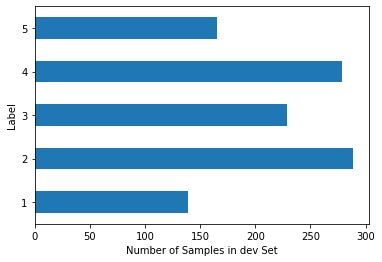

In [86]:
ax = dev['truth'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel("Number of Samples in dev Set")
ax.set_ylabel("Label")
plt.show()

In [87]:
data_dev = dev['text']

In [88]:
dev_X = list()

In [89]:
for i in range(len(dev)):
    integer_encoded = [ord(char) for char in data_dev[i]]
    dev_X.append(integer_encoded)

In [90]:
dev_X_test = np.array(dev_X)

In [91]:
dev_X_test.shape

(1101,)

In [92]:
dev_X_t = pad_sequences(dev_X_test, maxlen=267)

In [93]:
dev_X_t.shape

(1101, 267)

In [94]:
dev_y = pd.get_dummies(dev['truth']).values

In [95]:
dev_y

array([[0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0]], dtype=uint8)

### Test Data Visualizations ###

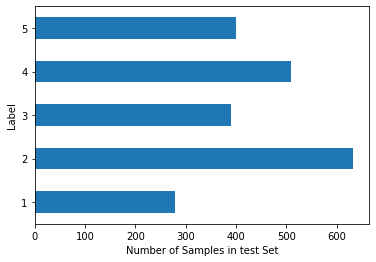

In [96]:
ax = test['truth'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel("Number of Samples in test Set")
ax.set_ylabel("Label")
plt.show()

In [97]:
data_test = test['text']

In [98]:
test_X = list()

In [99]:
for i in range(len(test)):
    integer_encoded = [ord(char) for char in data_test[i]]
    test_X.append(integer_encoded)

In [100]:
test_X_2 = np.array(test_X)

In [101]:
test_X_2.shape

(2210,)

In [102]:
test_X_t = pad_sequences(test_X_2, maxlen=267)

In [103]:
test_X_t.shape

(2210, 267)

In [104]:
test_y = pd.get_dummies(test['truth']).values

In [105]:
test_y

array([[0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0]], dtype=uint8)

### Training Data Visualizations ###

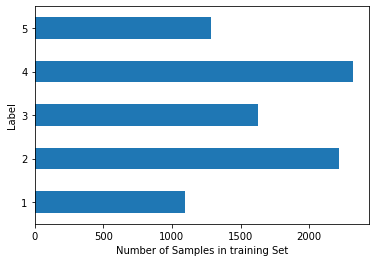

In [106]:


ax = df['truth'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel("Number of Samples in training Set")
ax.set_ylabel("Label")
plt.show()

In [277]:
y = df['truth'].values


In [278]:
y

[4, 5, 4, 3, 4, ..., 1, 2, 4, 1, 2]
Length: 8544
Categories (5, int64): [1, 2, 3, 4, 5]

In [109]:
y_train = np.array(y)

In [276]:
y_train

array([[0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [111]:
y_train[0]

4

In [112]:
y_train.shape

(8544,)

In [113]:
y_t = pd.get_dummies(df['truth']).values

In [114]:
y_t

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       ...,
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]], dtype=uint8)

In [115]:
len(y_t)

8544

In [116]:
from numpy import argmax
# define input string
#data = 'hello world'
data = df['text']
print(data[0])


The Rock is destined to be the 21st Century 's new `` Conan '' and that he 's going to make a splash even greater than Arnold Schwarzenegger , Jean-Claud Van Damme or Steven Segal .


In [117]:
X = list()

In [118]:
#X.append(onehot_encoded)

#X.append(integer_encoded)

In [119]:
len(data)

8544

In [120]:
for i in range(len(data)):
    integer_encoded = [ord(char) for char in data[i]]
    X.append(integer_encoded)

In [121]:
len(X[1])

226

In [ ]:
X

In [123]:
#X = np.array(onehot_encoded)

In [124]:
X_train = np.array(X)

In [ ]:
X_train

In [126]:
X_train.shape

(8544,)

In [127]:
# invert encoding
#inverted = int_to_char[argmax(onehot_encoded[0])]
#print(inverted)

In [128]:
X_train.shape

(8544,)

In [129]:
X_t = pad_sequences(X_train)

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, test_size=0.2, random_state=0)

## Create vanilla RNN model ##

In [287]:
model_rnn = tf.keras.Sequential()
model_rnn.add(layers.Embedding(5000, 256, input_length=X_train.shape[1]))

In [288]:
#model_rnn.add(layers.Dropout(0.3))

In [289]:
model_rnn.add(layers.SimpleRNN(256))
model_rnn.add(layers.Dense(5, activation='softmax'))

In [290]:
model_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rnn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 267, 256)          1280000   
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 1285      
Total params: 1,412,613
Trainable params: 1,412,613
Non-trainable params: 0
_________________________________________________________________


In [291]:
batch_size = 32
epochs = 10

In [292]:
# Clear any logs from previous runs
# !rm -rf ./logs/ 

In [293]:
log_dir_1="logs_1/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [294]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir_1, histogram_freq=1)

In [295]:
#model_rnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=2)


model_rnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=2, callbacks=[tensorboard_callback])

Train on 6835 samples, validate on 1709 samples
Epoch 1/10
6835/6835 - 29s - loss: 1.6206 - accuracy: 0.2506 - val_loss: 1.5783 - val_accuracy: 0.2709
Epoch 2/10
6835/6835 - 27s - loss: 1.6193 - accuracy: 0.2600 - val_loss: 1.5777 - val_accuracy: 0.2709
Epoch 3/10
6835/6835 - 27s - loss: 1.6368 - accuracy: 0.2506 - val_loss: 1.6156 - val_accuracy: 0.2657
Epoch 4/10
6835/6835 - 26s - loss: 1.5861 - accuracy: 0.2587 - val_loss: 1.5774 - val_accuracy: 0.2697
Epoch 5/10
6835/6835 - 26s - loss: 1.5891 - accuracy: 0.2648 - val_loss: 1.5862 - val_accuracy: 0.2697
Epoch 6/10
6835/6835 - 26s - loss: 1.5865 - accuracy: 0.2713 - val_loss: 1.5817 - val_accuracy: 0.2703
Epoch 7/10
6835/6835 - 26s - loss: 1.5854 - accuracy: 0.2679 - val_loss: 1.5842 - val_accuracy: 0.2709
Epoch 8/10
6835/6835 - 26s - loss: 1.5814 - accuracy: 0.2614 - val_loss: 1.5969 - val_accuracy: 0.2715
Epoch 9/10
6835/6835 - 26s - loss: 1.5902 - accuracy: 0.2680 - val_loss: 1.5852 - val_accuracy: 0.2738
Epoch 10/10
6835/6835 - 2

### Tensorboard Visualizations ###

In [2]:
%load_ext tensorboard

In [169]:
%tensorboard --logdir logs_1/fit

### Accuracy of vanilla rnn model on dev subset ###

In [ ]:
score, acc = model_rnn.evaluate(dev_X_t, dev_y)

In [343]:
acc

0.26430517

### Accuracy of vanilla rnn on dev subset = 26.43% ###

### Create vanilla RNN model - 2 ###


In [397]:
model_rnn_2 = tf.keras.Sequential()
model_rnn_2.add(layers.Embedding(5000, 256, input_length=X_train.shape[1]))

model_rnn_2.add(layers.SimpleRNN(256))
model_rnn_2.add(layers.Dense(5, activation='softmax'))


adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model_rnn_2.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#model_rnn.summary()

batch_size = 32
epochs = 20

log_dir_5="logs_5/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir_5, histogram_freq=1)

model_rnn_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=2, callbacks=[tensorboard_callback])


Train on 6835 samples, validate on 1709 samples
Epoch 1/20
6835/6835 - 28s - loss: 1.6073 - accuracy: 0.2534 - val_loss: 1.6004 - val_accuracy: 0.2703
Epoch 2/20
6835/6835 - 26s - loss: 1.5903 - accuracy: 0.2660 - val_loss: 1.5640 - val_accuracy: 0.2703
Epoch 3/20
6835/6835 - 26s - loss: 1.6017 - accuracy: 0.2614 - val_loss: 1.5946 - val_accuracy: 0.1861
Epoch 4/20
6835/6835 - 26s - loss: 1.5865 - accuracy: 0.2631 - val_loss: 1.6006 - val_accuracy: 0.1861
Epoch 5/20
6835/6835 - 26s - loss: 1.5823 - accuracy: 0.2718 - val_loss: 1.5997 - val_accuracy: 0.2709
Epoch 6/20
6835/6835 - 26s - loss: 1.5830 - accuracy: 0.2691 - val_loss: 1.5618 - val_accuracy: 0.2738
Epoch 7/20
6835/6835 - 27s - loss: 1.5866 - accuracy: 0.2658 - val_loss: 1.6199 - val_accuracy: 0.1270
Epoch 8/20
6835/6835 - 26s - loss: 1.5873 - accuracy: 0.2604 - val_loss: 1.6174 - val_accuracy: 0.2738
Epoch 9/20
6835/6835 - 26s - loss: 1.5778 - accuracy: 0.2642 - val_loss: 1.5705 - val_accuracy: 0.2750
Epoch 10/20
6835/6835 - 2

### With learning_rate = 0.001 ###

In [170]:
%tensorboard --logdir logs_5/fit

### With learning_rate = 0.01 ###

In [171]:
%tensorboard --logdir logs_4/fit

### Create vanilla RNN model - 3 ###

In [251]:
model_rnn_3 = tf.keras.Sequential()
model_rnn_3.add(layers.Embedding(5000, 350, input_length=X_train.shape[1]))

model_rnn_3.add(layers.SimpleRNN(350))
model_rnn_3.add(layers.Dense(5, activation='softmax'))


adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model_rnn_3.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#model_rnn.summary()

batch_size = 32
epochs = 20

log_dir_19="logs_19/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir_19, histogram_freq=1)

model_rnn_3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=2, callbacks=[tensorboard_callback])


Train on 6835 samples, validate on 1709 samples
Epoch 1/20
6835/6835 - 44s - loss: 1.6198 - accuracy: 0.2493 - val_loss: 1.5842 - val_accuracy: 0.2703
Epoch 2/20
6835/6835 - 41s - loss: 1.6034 - accuracy: 0.2559 - val_loss: 1.5649 - val_accuracy: 0.2709
Epoch 3/20
6835/6835 - 41s - loss: 1.5930 - accuracy: 0.2613 - val_loss: 1.6117 - val_accuracy: 0.1861
Epoch 4/20
6835/6835 - 41s - loss: 1.5893 - accuracy: 0.2673 - val_loss: 1.6076 - val_accuracy: 0.1732
Epoch 5/20
6835/6835 - 41s - loss: 1.5954 - accuracy: 0.2582 - val_loss: 1.5960 - val_accuracy: 0.1861
Epoch 6/20
6835/6835 - 41s - loss: 1.5898 - accuracy: 0.2614 - val_loss: 1.5620 - val_accuracy: 0.2727
Epoch 7/20
6835/6835 - 41s - loss: 1.5871 - accuracy: 0.2623 - val_loss: 1.5816 - val_accuracy: 0.2703
Epoch 8/20
6835/6835 - 41s - loss: 1.5912 - accuracy: 0.2667 - val_loss: 1.5778 - val_accuracy: 0.2709
Epoch 9/20
6835/6835 - 41s - loss: 1.5873 - accuracy: 0.2604 - val_loss: 1.5837 - val_accuracy: 0.2697
Epoch 10/20
6835/6835 - 4

In [262]:
%tensorboard --logdir logs_19/fit

ERROR: Failed to launch TensorBoard (exited with 255).
Contents of stderr:
E1112 00:12:30.043277 140338601187136 program.py:226] TensorBoard could not bind to any port around 6006 (tried 10 times)
ERROR: TensorBoard could not bind to any port around 6006 (tried 10 times)

### Create vanilla RNN model - 4  - Double Layer size ###

In [194]:
model_rnn_4 = tf.keras.Sequential()
model_rnn_4.add(layers.Embedding(5000, 256, input_length=X_train.shape[1]))

model_rnn_4.add(layers.SimpleRNN(256, return_sequences=True))

model_rnn_4.add(layers.SimpleRNN(256))

model_rnn_4.add(layers.Dense(5, activation='softmax'))


adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model_rnn_4.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#model_rnn.summary()

batch_size = 32
epochs = 20

log_dir_14="logs_14/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir_14, histogram_freq=1)

model_rnn_4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=2, callbacks=[tensorboard_callback])


Train on 6835 samples, validate on 1709 samples
Epoch 1/20
6835/6835 - 53s - loss: 1.7610 - accuracy: 0.2136 - val_loss: 1.5712 - val_accuracy: 0.2657
Epoch 2/20
6835/6835 - 49s - loss: 1.6294 - accuracy: 0.2530 - val_loss: 1.5805 - val_accuracy: 0.2662
Epoch 3/20
6835/6835 - 49s - loss: 1.5864 - accuracy: 0.2591 - val_loss: 1.5716 - val_accuracy: 0.2662
Epoch 4/20
6835/6835 - 51s - loss: 1.5836 - accuracy: 0.2626 - val_loss: 1.5884 - val_accuracy: 0.2703
Epoch 5/20
6835/6835 - 50s - loss: 1.5904 - accuracy: 0.2634 - val_loss: 1.5725 - val_accuracy: 0.2662
Epoch 6/20
6835/6835 - 51s - loss: 1.5873 - accuracy: 0.2638 - val_loss: 1.5823 - val_accuracy: 0.2662
Epoch 7/20
6835/6835 - 49s - loss: 1.5872 - accuracy: 0.2617 - val_loss: 1.5919 - val_accuracy: 0.2703
Epoch 8/20
6835/6835 - 49s - loss: 1.5893 - accuracy: 0.2655 - val_loss: 1.5754 - val_accuracy: 0.2662
Epoch 9/20
6835/6835 - 49s - loss: 1.5906 - accuracy: 0.2616 - val_loss: 1.5897 - val_accuracy: 0.2662
Epoch 10/20
6835/6835 - 5

## Doubling the layer of vanilla RNN does not improve validation accuracy ##

In [263]:
%tensorboard --logdir logs_14/fit

ERROR: Failed to launch TensorBoard (exited with 255).
Contents of stderr:
E1112 00:12:55.089560 140568162531136 program.py:226] TensorBoard could not bind to any port around 6006 (tried 10 times)
ERROR: TensorBoard could not bind to any port around 6006 (tried 10 times)

### Create LSTM Model ###

In [298]:
# Clear any logs from previous runs
#!rm -rf ./logs/ 

In [219]:
log_dir_18="logs_18/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [220]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir_18, histogram_freq=1)

In [221]:
model_lstm = tf.keras.Sequential()
model_lstm.add(layers.Embedding(5000, 500, input_length=X_train.shape[1]))

In [222]:
model_lstm.add(layers.Dropout(0.5))

In [223]:
model_lstm.add(layers.LSTM(500, dropout=0.5, recurrent_dropout=0.5))
model_lstm.add(layers.Dense(5, activation='softmax'))

In [224]:
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 267, 500)          2500000   
_________________________________________________________________
dropout_4 (Dropout)          (None, 267, 500)          0         
_________________________________________________________________
lstm_28 (LSTM)               (None, 500)               2002000   
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 2505      
Total params: 4,504,505
Trainable params: 4,504,505
Non-trainable params: 0
_________________________________________________________________


In [225]:
batch_size = 32
epochs = 15

In [226]:
model_lstm.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=2, callbacks=[tensorboard_callback])

Train on 6835 samples, validate on 1709 samples
Epoch 1/15
6835/6835 - 276s - loss: 1.5758 - accuracy: 0.2742 - val_loss: 1.5610 - val_accuracy: 0.2756
Epoch 2/15
6835/6835 - 272s - loss: 1.5708 - accuracy: 0.2683 - val_loss: 1.5681 - val_accuracy: 0.2756
Epoch 3/15
6835/6835 - 277s - loss: 1.5636 - accuracy: 0.2907 - val_loss: 1.5733 - val_accuracy: 0.2733
Epoch 4/15
6835/6835 - 272s - loss: 1.5649 - accuracy: 0.2803 - val_loss: 1.5561 - val_accuracy: 0.2779
Epoch 5/15
6835/6835 - 271s - loss: 1.5614 - accuracy: 0.2806 - val_loss: 1.5636 - val_accuracy: 0.2750
Epoch 6/15
6835/6835 - 270s - loss: 1.5574 - accuracy: 0.2907 - val_loss: 1.5569 - val_accuracy: 0.2902
Epoch 7/15
6835/6835 - 271s - loss: 1.5593 - accuracy: 0.2910 - val_loss: 1.5576 - val_accuracy: 0.2762
Epoch 8/15
6835/6835 - 271s - loss: 1.5548 - accuracy: 0.2926 - val_loss: 1.5567 - val_accuracy: 0.2844
Epoch 9/15
6835/6835 - 272s - loss: 1.5549 - accuracy: 0.2854 - val_loss: 1.5529 - val_accuracy: 0.2978
Epoch 10/15
6835

In [264]:
%tensorboard --logdir logs_18/fit

ERROR: Failed to launch TensorBoard (exited with 255).
Contents of stderr:
E1112 00:13:29.759110 140098707699520 program.py:226] TensorBoard could not bind to any port around 6006 (tried 10 times)
ERROR: TensorBoard could not bind to any port around 6006 (tried 10 times)

In [228]:
loss, acc = model_lstm.evaluate(test_X_t, test_y, verbose=2)
print("Test set Accuracy: {:5.2f}%".format(100*acc))

2210/1 - 29s - loss: 1.5446 - accuracy: 0.2588
Test set Accuracy: 25.88%


In [218]:
loss, acc = model_lstm.evaluate(test_X_t, test_y, verbose=2)
print("Test set Accuracy: {:5.2f}%".format(100*acc))

2210/1 - 9s - loss: 1.5518 - accuracy: 0.2683
Test set Accuracy: 26.83%


In [265]:
%tensorboard --logdir logs_17/fit

ERROR: Failed to launch TensorBoard (exited with 255).
Contents of stderr:
E1112 00:13:54.057028 139840611579712 program.py:226] TensorBoard could not bind to any port around 6006 (tried 10 times)
ERROR: TensorBoard could not bind to any port around 6006 (tried 10 times)

### LSTM Tensorboard Visualizations ###

In [173]:
%tensorboard --logdir logs_2/fit

### Accuracy of LSTM model on dev subset ###

In [ ]:
score, acc = model_lstm.evaluate(dev_X_t, dev_y)

In [345]:
acc

0.2770209

### Accuracy of LSTM on dev subset = 27.70% ###

### Create LSTM Model - 2 ###

In [401]:
log_dir_7="logs_7/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir_7, histogram_freq=1)

In [402]:
model_lstm_2 = tf.keras.Sequential()
model_lstm_2.add(layers.Embedding(5000, 256, input_length=X_train.shape[1]))



model_lstm_2.add(layers.Dropout(0.3))

model_lstm_2.add(layers.LSTM(256, dropout=0.3, recurrent_dropout=0.2))
model_lstm_2.add(layers.Dense(5, activation='softmax'))

adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model_lstm_2.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#model_lstm.summary()


batch_size = 16
epochs = 100

model_lstm_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=2, callbacks=[tensorboard_callback])

Train on 6835 samples, validate on 1709 samples
Epoch 1/100
6835/6835 - 124s - loss: 1.5718 - accuracy: 0.2713 - val_loss: 1.5603 - val_accuracy: 0.2803
Epoch 2/100
6835/6835 - 119s - loss: 1.5649 - accuracy: 0.2809 - val_loss: 1.5618 - val_accuracy: 0.2879
Epoch 3/100
6835/6835 - 119s - loss: 1.5611 - accuracy: 0.2799 - val_loss: 1.5610 - val_accuracy: 0.2756
Epoch 4/100
6835/6835 - 119s - loss: 1.5587 - accuracy: 0.2909 - val_loss: 1.5599 - val_accuracy: 0.2815
Epoch 5/100
6835/6835 - 119s - loss: 1.5556 - accuracy: 0.2938 - val_loss: 1.5612 - val_accuracy: 0.2768
Epoch 6/100
6835/6835 - 120s - loss: 1.5554 - accuracy: 0.2857 - val_loss: 1.5584 - val_accuracy: 0.2756
Epoch 7/100
6835/6835 - 119s - loss: 1.5474 - accuracy: 0.2951 - val_loss: 1.5655 - val_accuracy: 0.2709
Epoch 8/100
6835/6835 - 119s - loss: 1.5454 - accuracy: 0.2973 - val_loss: 1.5561 - val_accuracy: 0.2692
Epoch 9/100
6835/6835 - 119s - loss: 1.5429 - accuracy: 0.3065 - val_loss: 1.5597 - val_accuracy: 0.2779
Epoch 1

In [174]:
%tensorboard --logdir logs_7/fit

### Doubling LSTM ###

In [196]:
model_lstm_3 = tf.keras.Sequential()
model_lstm_3.add(layers.Embedding(5000, 256, input_length=X_train.shape[1]))



model_lstm_3.add(layers.Dropout(0.3))

model_lstm_3.add(layers.LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))


model_lstm_3.add(layers.LSTM(256, dropout=0.3, recurrent_dropout=0.2))

model_lstm_3.add(layers.Dense(5, activation='softmax'))

adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

model_lstm_3.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#model_lstm.summary()


batch_size = 16
epochs = 10


log_dir_15="logs_15/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir_15, histogram_freq=1)

model_lstm_3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=2, callbacks=[tensorboard_callback])

Train on 6835 samples, validate on 1709 samples
Epoch 1/10
6835/6835 - 247s - loss: 1.5763 - accuracy: 0.2598 - val_loss: 1.5657 - val_accuracy: 0.2668
Epoch 2/10
6835/6835 - 237s - loss: 1.5696 - accuracy: 0.2723 - val_loss: 1.5665 - val_accuracy: 0.2873
Epoch 3/10
6835/6835 - 237s - loss: 1.5683 - accuracy: 0.2783 - val_loss: 1.5698 - val_accuracy: 0.2715
Epoch 4/10
6835/6835 - 235s - loss: 1.5728 - accuracy: 0.2695 - val_loss: 1.5652 - val_accuracy: 0.2662
Epoch 5/10
6835/6835 - 235s - loss: 1.5691 - accuracy: 0.2699 - val_loss: 1.5630 - val_accuracy: 0.2697
Epoch 6/10
6835/6835 - 239s - loss: 1.5677 - accuracy: 0.2742 - val_loss: 1.5570 - val_accuracy: 0.2744
Epoch 7/10
6835/6835 - 236s - loss: 1.5667 - accuracy: 0.2740 - val_loss: 1.5583 - val_accuracy: 0.2727
Epoch 8/10
6835/6835 - 235s - loss: 1.5659 - accuracy: 0.2794 - val_loss: 1.5599 - val_accuracy: 0.2727
Epoch 9/10
6835/6835 - 235s - loss: 1.5654 - accuracy: 0.2780 - val_loss: 1.5584 - val_accuracy: 0.2733
Epoch 10/10
6835

## Doubling LSTM layer does not improve validation accuracy ##

In [268]:
%tensorboard --logdir logs_15/fit

ERROR: Failed to launch TensorBoard (exited with 255).
Contents of stderr:
E1112 00:15:39.989207 140272832292672 program.py:226] TensorBoard could not bind to any port around 6006 (tried 10 times)
ERROR: TensorBoard could not bind to any port around 6006 (tried 10 times)

## Create GRU model ##

In [238]:
model_gru = tf.keras.Sequential()
model_gru.add(layers.Embedding(5000, 256, input_length=X_train.shape[1]))

In [239]:
model_gru.add(layers.GRU(256))
model_gru.add(layers.Dense(5, activation='softmax'))

In [240]:
model_gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_gru.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 267, 256)          1280000   
_________________________________________________________________
gru_2 (GRU)                  (None, 256)               394752    
_________________________________________________________________
dense_14 (Dense)             (None, 5)                 1285      
Total params: 1,676,037
Trainable params: 1,676,037
Non-trainable params: 0
_________________________________________________________________


In [241]:
batch_size = 32
epochs = 20

In [242]:
# Clear any logs from previous runs
#!rm -rf ./logs/ 

In [243]:
log_dir_3="logs_3/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [244]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir_3, histogram_freq=1)

In [245]:
model_gru.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=2, callbacks=[tensorboard_callback])

Train on 6835 samples, validate on 1709 samples
Epoch 1/20
6835/6835 - 72s - loss: 1.5719 - accuracy: 0.2692 - val_loss: 1.5626 - val_accuracy: 0.2779
Epoch 2/20
6835/6835 - 68s - loss: 1.5653 - accuracy: 0.2742 - val_loss: 1.5680 - val_accuracy: 0.2727
Epoch 3/20
6835/6835 - 69s - loss: 1.5596 - accuracy: 0.2830 - val_loss: 1.5621 - val_accuracy: 0.2686
Epoch 4/20
6835/6835 - 69s - loss: 1.5551 - accuracy: 0.2939 - val_loss: 1.5637 - val_accuracy: 0.2744
Epoch 5/20
6835/6835 - 68s - loss: 1.5519 - accuracy: 0.2951 - val_loss: 1.5624 - val_accuracy: 0.2774
Epoch 6/20
6835/6835 - 68s - loss: 1.5481 - accuracy: 0.2985 - val_loss: 1.5650 - val_accuracy: 0.2762
Epoch 7/20
6835/6835 - 68s - loss: 1.5442 - accuracy: 0.3023 - val_loss: 1.5559 - val_accuracy: 0.2873
Epoch 8/20
6835/6835 - 68s - loss: 1.5398 - accuracy: 0.2999 - val_loss: 1.5626 - val_accuracy: 0.2978
Epoch 9/20
6835/6835 - 70s - loss: 1.5340 - accuracy: 0.3138 - val_loss: 1.5642 - val_accuracy: 0.2896
Epoch 10/20
6835/6835 - 6

### GRU Tensorboard Visualizations ###

In [269]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [270]:
%tensorboard --logdir logs_3/fit

Reusing TensorBoard on port 6015 (pid 20542), started 2 days, 15:33:50 ago. (Use '!kill 20542' to kill it.)

### Accuracy of GRU model on dev subset ###

In [ ]:
score, acc = model_gru.evaluate(dev_X_t, dev_y)

In [347]:
acc

0.25613078

### Accuracy of GRU model on dev subset = 25.61% ###

## Create GRU model - 2 ##

In [418]:
model_gru_2 = tf.keras.Sequential()
model_gru_2.add(layers.Embedding(5000, 256, input_length=X_train.shape[1]))


model_gru_2.add(layers.Dropout(0.3))

model_gru_2.add(layers.GRU(256))


model_gru_2.add(layers.Dropout(0.3))



model_gru_2.add(layers.Dense(5, activation='softmax'))

model_gru_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_gru_2.summary()

batch_size = 32
epochs = 10


log_dir_9="logs_9/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir_9, histogram_freq=1)


model_gru_2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=2, callbacks=[tensorboard_callback])



Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_26 (Embedding)     (None, 267, 256)          1280000   
_________________________________________________________________
dropout_5 (Dropout)          (None, 267, 256)          0         
_________________________________________________________________
gru_4 (GRU)                  (None, 256)               394752    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 1285      
Total params: 1,676,037
Trainable params: 1,676,037
Non-trainable params: 0
_________________________________________________________________
Train on 6835 samples, validate on 1709 samples
Epoch 1/10
6835/6835 - 74s - loss: 1.5734 - accuracy: 0.2658 

In [271]:
%tensorboard --logdir logs_9/fit

ERROR: Failed to launch TensorBoard (exited with 255).
Contents of stderr:
E1112 00:16:19.276887 140082655811392 program.py:226] TensorBoard could not bind to any port around 6006 (tried 10 times)
ERROR: TensorBoard could not bind to any port around 6006 (tried 10 times)

### Doubling GRU layer model ###

In [198]:
model_gru_3 = tf.keras.Sequential()
model_gru_3.add(layers.Embedding(5000, 256, input_length=X_train.shape[1]))


model_gru_3.add(layers.Dropout(0.3))

model_gru_3.add(layers.GRU(256, return_sequences=True))

model_gru_3.add(layers.GRU(256))


model_gru_3.add(layers.Dropout(0.3))



model_gru_3.add(layers.Dense(5, activation='softmax'))

model_gru_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model_gru_3.summary()

batch_size = 32
epochs = 10


log_dir_16="logs_16/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir_16, histogram_freq=1)


#model_gru_3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=2, callbacks=[tensorboard_callback])

model_gru_3.fit(X_t, y_t, validation_data=(dev_X_t, dev_y), epochs=epochs, batch_size=batch_size, verbose=2, callbacks=[tensorboard_callback])



Train on 8544 samples, validate on 1101 samples
Epoch 1/10
8544/8544 - 160s - loss: 1.5742 - accuracy: 0.2697 - val_loss: 1.5765 - val_accuracy: 0.2543
Epoch 2/10
8544/8544 - 152s - loss: 1.5666 - accuracy: 0.2796 - val_loss: 1.5808 - val_accuracy: 0.2498
Epoch 3/10
8544/8544 - 152s - loss: 1.5653 - accuracy: 0.2773 - val_loss: 1.5706 - val_accuracy: 0.2625
Epoch 4/10
8544/8544 - 152s - loss: 1.5623 - accuracy: 0.2811 - val_loss: 1.5721 - val_accuracy: 0.2725
Epoch 5/10
8544/8544 - 152s - loss: 1.5599 - accuracy: 0.2786 - val_loss: 1.5771 - val_accuracy: 0.2480
Epoch 6/10
8544/8544 - 152s - loss: 1.5571 - accuracy: 0.2933 - val_loss: 1.5853 - val_accuracy: 0.2543
Epoch 7/10
8544/8544 - 152s - loss: 1.5530 - accuracy: 0.2921 - val_loss: 1.5823 - val_accuracy: 0.2707
Epoch 8/10
8544/8544 - 152s - loss: 1.5515 - accuracy: 0.2949 - val_loss: 1.5787 - val_accuracy: 0.2834
Epoch 9/10
8544/8544 - 152s - loss: 1.5456 - accuracy: 0.2990 - val_loss: 1.5703 - val_accuracy: 0.2570
Epoch 10/10
8544

## Doubling GRU model layer does not improve validation accuracy ##

In [199]:
%tensorboard --logdir logs_16/fit

ERROR: Failed to launch TensorBoard (exited with 255).
Contents of stderr:
E1110 00:51:09.285538 139798023501632 program.py:226] TensorBoard could not bind to any port around 6006 (tried 10 times)
ERROR: TensorBoard could not bind to any port around 6006 (tried 10 times)

### Overfitting - with dropout=0.3 ###

In [177]:
%tensorboard --logdir logs_8/fit

ERROR: Failed to launch TensorBoard (exited with 255).
Contents of stderr:
E1109 08:42:37.262158 140054096025408 program.py:226] TensorBoard could not bind to any port around 6006 (tried 10 times)
ERROR: TensorBoard could not bind to any port around 6006 (tried 10 times)

In [134]:
X_train.shape

(6835, 267)

## BiDIRECTIONAL RNN ##

In [158]:
model_bid = tf.keras.Sequential()

model_bid.add(layers.Embedding(5000, 10, input_length=X_train.shape[1]))


model_bid.add(layers.Bidirectional(layers.LSTM(10, return_sequences=True)))

#model_bid.add(layers.Bidirectional(layers.LSTM(10, return_sequences=True), input_shape=(6835, 267)))



model_bid.add(layers.Bidirectional(layers.LSTM(10)))
model_bid.add(layers.Dense(5))
model_bid.add(layers.Activation('softmax'))
model_bid.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model_bid.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 267, 10)           50000     
_________________________________________________________________
bidirectional_17 (Bidirectio (None, 267, 20)           1680      
_________________________________________________________________
bidirectional_18 (Bidirectio (None, 20)                2480      
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 105       
_________________________________________________________________
activation_7 (Activation)    (None, 5)                 0         
Total params: 54,265
Trainable params: 54,265
Non-trainable params: 0
_________________________________________________________________


In [166]:
batch_size = 32
epochs = 10


log_dir_13="logs_13/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir_13, histogram_freq=1)

# define checkpoint
checkpoint_path = "training_2/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, monitor='accuracy', save_best_only=True, mode='max', save_weights_only=True, verbose=1)


model_bid.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=2, callbacks=[tensorboard_callback, cp_callback])



Train on 6835 samples, validate on 1709 samples
Epoch 1/10

Epoch 00001: accuracy improved from -inf to 0.32963, saving model to training_2/cp.ckpt
6835/6835 - 46s - loss: 1.5152 - accuracy: 0.3296 - val_loss: 1.5677 - val_accuracy: 0.2867
Epoch 2/10

Epoch 00002: accuracy did not improve from 0.32963
6835/6835 - 38s - loss: 1.5167 - accuracy: 0.3251 - val_loss: 1.5604 - val_accuracy: 0.2937
Epoch 3/10

Epoch 00003: accuracy did not improve from 0.32963
6835/6835 - 38s - loss: 1.5152 - accuracy: 0.3293 - val_loss: 1.5642 - val_accuracy: 0.2932
Epoch 4/10

Epoch 00004: accuracy improved from 0.32963 to 0.33021, saving model to training_2/cp.ckpt
6835/6835 - 38s - loss: 1.5127 - accuracy: 0.3302 - val_loss: 1.5741 - val_accuracy: 0.2733
Epoch 5/10

Epoch 00005: accuracy improved from 0.33021 to 0.33270, saving model to training_2/cp.ckpt
6835/6835 - 38s - loss: 1.5113 - accuracy: 0.3327 - val_loss: 1.5642 - val_accuracy: 0.2803
Epoch 6/10

Epoch 00006: accuracy improved from 0.33270 to 0

In [167]:
# Loads the weights
model_bid.load_weights(checkpoint_path)

loss, acc = model_bid.evaluate(test_X_t, test_y, verbose=2)
print("Test set Accuracy: {:5.2f}%".format(100*acc))

2210/1 - 2s - loss: 1.7128 - accuracy: 0.2986
Test set Accuracy: 29.86%


In [168]:
%tensorboard --logdir logs_13/fit

### evaluation on test data ###

In [ ]:
# Loads the weights
model_bid.load_weights(checkpoint_path)

loss, acc = model_bid.evaluate(test_X_t, test_y, verbose=2)
print("Test set Accuracy: {:5.2f}%".format(100*acc))

## Test set Accuracy: 29.86%  - Using Bidirectional LSTM ##

In [165]:
%tensorboard --logdir logs_12/fit

### Bidirectional LSTM with 20 epochs ###

In [160]:
%tensorboard --logdir logs_11/fit

### Bidirectional - with 10 epochs ###

In [178]:
%tensorboard --logdir logs_10/fit

ERROR: Failed to launch TensorBoard (exited with 255).
Contents of stderr:
E1109 08:42:54.047511 140117797828416 program.py:226] TensorBoard could not bind to any port around 6006 (tried 10 times)
ERROR: TensorBoard could not bind to any port around 6006 (tried 10 times)

### Task 4 - Evaluate best model on test data ###

In [ ]:
score, acc = model_lstm.evaluate(test_X_t, test_y)

In [358]:
acc

0.28597286

### Accuracy of the best model on test data = 28.60% ###

In [359]:
score, acc = model_gru.evaluate(test_X_t, test_y)

2210/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [360]:
score, acc = model_rnn.evaluate(test_X_t, test_y)

2210/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [232]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

## Evaluation of best LSTM model on the test set ##

In [229]:
predictions_lstm = np.argmax(model_lstm.predict(test_X_t), axis=1)

In [230]:
predictions_lstm

array([1, 3, 1, ..., 3, 3, 1])

In [379]:
predictions_lstm[-10:]

array([1, 1, 1, 1, 3, 3, 4, 4, 1, 1])

In [368]:
len(test_y)

2210

In [233]:
cm_lstm = metrics.confusion_matrix(test['truth'].values, predictions_lstm)
print(cm_lstm)

[[  0   0   0   0   0   0]
 [  1  93   6 173   6   0]
 [  0 177  14 432  10   0]
 [  0 114  11 259   5   0]
 [  0 117   6 374  13   0]
 [  2  81   5 302   9   0]]


In [234]:
from sklearn.metrics import classification_report

In [235]:
print(classification_report(test['truth'].values, predictions_lstm))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.16      0.33      0.22       279
           2       0.33      0.02      0.04       633
           3       0.17      0.67      0.27       389
           4       0.30      0.03      0.05       510
           5       0.00      0.00      0.00       399

    accuracy                           0.17      2210
   macro avg       0.16      0.17      0.10      2210
weighted avg       0.22      0.17      0.10      2210



/home/demolakstate/anaconda3/envs/nlp/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/demolakstate/anaconda3/envs/nlp/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Evaluation of best GRU model on the test set ##

In [249]:
predictions_gru = np.argmax(model_gru.predict(test_X_t), axis=1)

predictions_gru

cm_gru = metrics.confusion_matrix(test['truth'].values, predictions_gru)
print(cm_gru)

print(classification_report(test['truth'].values, predictions_gru))


[[  0   0   0   0   0   0]
 [ 37  88  53  76  25   0]
 [ 79 198 126 181  49   0]
 [ 38  88  87 142  34   0]
 [ 38  87  89 205  91   0]
 [ 20  45  55 183  96   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.17      0.32      0.22       279
           2       0.31      0.20      0.24       633
           3       0.18      0.37      0.24       389
           4       0.31      0.18      0.23       510
           5       0.00      0.00      0.00       399

    accuracy                           0.20      2210
   macro avg       0.16      0.18      0.16      2210
weighted avg       0.21      0.20      0.19      2210



/home/demolakstate/anaconda3/envs/nlp/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/demolakstate/anaconda3/envs/nlp/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Evaluation of best RNN model on the test set ##

In [255]:
predictions_rnn = np.argmax(model_rnn_3.predict(test_X_t), axis=1)

predictions_rnn

cm_rnn = metrics.confusion_matrix(test['truth'].values, predictions_rnn)
print(cm_rnn)

print(classification_report(test['truth'].values, predictions_rnn))

[[  9   2 184  84   0]
 [ 12   6 431 184   0]
 [ 17   7 268  97   0]
 [  6   3 349 152   0]
 [  0   4 282 113   0]]
              precision    recall  f1-score   support

           1       0.20      0.03      0.06       279
           2       0.27      0.01      0.02       633
           3       0.18      0.69      0.28       389
           4       0.24      0.30      0.27       510
           5       0.00      0.00      0.00       399

    accuracy                           0.20      2210
   macro avg       0.18      0.21      0.12      2210
weighted avg       0.19      0.20      0.12      2210



/home/demolakstate/anaconda3/envs/nlp/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Discussion of the different models performance ##

### Bidirectional LSTM had the highest accuracy of 29.86% on the test data. This is followed by LSTM and RNN both with 28.60% and finally GRU model of 27.69%. MODEL_RNN_3 did well in predicting sentences of label 3 - "Neutral" with an F-Score of 28%. The model did badly on all other classes, and most especially on label 5. MODEL_GRU did well on labels 3 and 1 with F-Score of 24% and 22% respectively, but badly on the others and especially on label 5. MODEL_LSTM did well on label 3, but badly on all others and especially label 5. In conclusion, all the experiemented model architectures were able to do a good job in classifying sentence sentiments that are "Neutral". They all struggled with "Strongly Positive"  sentiments. ###

## Task 4 - Text Generation Language Model ##

In [183]:
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

In [184]:
raw_text = df['text'].str.lower()

In [185]:
raw_text

0       the rock is destined to be the 21st century 's...
1       the gorgeously elaborate continuation of `` th...
2       singer/composer bryan adams contributes a slew...
3       you 'd think by now america would have had eno...
4                    yet the act is still charming here .
                              ...                        
8539                                      a real snooze .
8540                                       no surprises .
8541    we 've seen the hippie-turned-yuppie plot befo...
8542    her fans walked out muttering words like `` ho...
8543                                  in this case zero .
Name: text, Length: 8544, dtype: object

In [186]:
# create mapping of unique chars to integers
chars = sorted(list(set(raw_text)))

char_to_int = dict((c, i) for i, c in enumerate(chars))

In [187]:
# summarize the loaded data
n_chars = len(raw_text)
n_vocab = len(chars)

print("Total Characters: ", n_chars)
print("Total Vocab: ", n_vocab)



Total Characters:  8544
Total Vocab:  8534


In [188]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
    seq_in = raw_text[i:i + seq_length]
    seq_out = raw_text[i + seq_length]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])
    
    
n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)

Total Patterns:  8444


In [189]:
# reshape X to be [samples, time steps, features]
X = np.reshape(dataX, (n_patterns, seq_length, 1))

# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)

In [190]:
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [436]:
# define the checkpoint
filepath="Weights-LSTM-improvement-{epoch:02d}-{loss:.4f}-bigger.hdfs"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint]

# fit the model

model.fit(X, y, epochs=80, batch_size=64, callbacks=callbacks_list)

Epoch 1/80
8444/8444 [==============================] - 53s 6ms/step - loss: 9.0646

Epoch 00001: loss improved from inf to 9.06460, saving model to Weights-LSTM-improvement-01-9.0646-bigger.hdfs
Epoch 2/80
8444/8444 [==============================] - 52s 6ms/step - loss: 9.0822

Epoch 00002: loss did not improve from 9.06460
Epoch 3/80
8444/8444 [==============================] - 52s 6ms/step - loss: 9.0538

Epoch 00003: loss improved from 9.06460 to 9.05378, saving model to Weights-LSTM-improvement-03-9.0538-bigger.hdfs
Epoch 4/80
8444/8444 [==============================] - 52s 6ms/step - loss: 9.0529

Epoch 00004: loss improved from 9.05378 to 9.05290, saving model to Weights-LSTM-improvement-04-9.0529-bigger.hdfs
Epoch 5/80
8444/8444 [==============================] - 52s 6ms/step - loss: 9.0522

Epoch 00005: loss improved from 9.05290 to 9.05219, saving model to Weights-LSTM-improvement-05-9.0522-bigger.hdfs
Epoch 6/80
8444/8444 [==============================] - 52s 6ms/step - l

In [438]:
# Load Larger LSTM network and generate text

import sys

int_to_char = dict((i, c) for i, c in enumerate(chars))
# summarize the loaded data
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters: ", n_chars)
print("Total Vocab: ", n_vocab)

# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []

for i in range(0, n_chars - seq_length, 1):
    seq_in = raw_text[i:i + seq_length]
    seq_out = raw_text[i + seq_length]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])
    
n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)
# reshape X to be [samples, time steps, features]
X = np.reshape(dataX, (n_patterns, seq_length, 1))

# normalize

X = X / float(n_vocab)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)

# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))

# Load the network weights
filename = "Weights-LSTM-improvement-80-9.0447-bigger.hdfs"
#filename = "Weights-LSTM-improvement-44-1.3592-bigger.hdfs"
model.load_weights(filename)

model.compile(loss='categorical_crossentropy', optimizer='adam')

# pick a random seed

start = np.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print("Seed:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
# generate characters
for i in range(700):
    x = np.reshape(pattern, (1, len(pattern), 1))
    x = x / float(n_vocab)
    prediction = model.predict(x, verbose=0)
    index = np.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    sys.stdout.write(result)
    pattern.append(index)
    pattern = pattern[1:len(pattern)]
    
print("\nDone")

Total Characters:  8544
Total Vocab:  8534
Total Patterns:  8444
Seed:
" a generic family comedy unlikely to be appreciated by anyone outside the under-10 set .kung pow seems like some futile concoction that was developed hastily after oedekerk and his fellow moviemakers got through crashing a college keg party .kurys seems intimidated by both her subject matter and the period trappings of this debut venture into the heritage business .the film virtually chokes on its own self-consciousness .a manipulative feminist empowerment tale thinly posing as a serious drama about spousal abuse .everything in maid in manhattan is exceedingly pleasant , designed not to offend .it goes down easy , leaving virtually no aftertaste .a profoundly stupid affair , populating its hackneyed and meanspirited storyline with cardboard characters and performers who value cash above credibility .... pays tribute to heroes the way julia roberts hands out awards -- with phony humility barely camouflaging grotesqu

KeyboardInterrupt: 

## 100 epochs ##

In [57]:
# define the checkpoint
filepath="Weights-LSTM-improvement-{epoch:02d}-{loss:.4f}-bigger.hdfs"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint]

# fit the model

model.fit(X, y, epochs=100, batch_size=64, callbacks=callbacks_list)

Epoch 1/100
8444/8444 [==============================] - 53s 6ms/step - loss: 9.0181

Epoch 00001: loss improved from inf to 9.01810, saving model to Weights-LSTM-improvement-01-9.0181-bigger.hdfs
Epoch 2/100
8444/8444 [==============================] - 52s 6ms/step - loss: 9.0817

Epoch 00002: loss did not improve from 9.01810
Epoch 3/100
8444/8444 [==============================] - 53s 6ms/step - loss: 9.0610

Epoch 00003: loss did not improve from 9.01810
Epoch 4/100
8444/8444 [==============================] - 53s 6ms/step - loss: 9.0511

Epoch 00004: loss did not improve from 9.01810
Epoch 5/100
8444/8444 [==============================] - 52s 6ms/step - loss: 9.0238

Epoch 00005: loss did not improve from 9.01810
Epoch 6/100
8444/8444 [==============================] - 52s 6ms/step - loss: 8.8395

Epoch 00006: loss improved from 9.01810 to 8.83950, saving model to Weights-LSTM-improvement-06-8.8395-bigger.hdfs
Epoch 7/100
8444/8444 [==============================] - 52s 6ms/step 

In [60]:
# Load Larger LSTM network and generate text

import sys

int_to_char = dict((i, c) for i, c in enumerate(chars))
# summarize the loaded data
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters: ", n_chars)
print("Total Vocab: ", n_vocab)

# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []

for i in range(0, n_chars - seq_length, 1):
    seq_in = raw_text[i:i + seq_length]
    seq_out = raw_text[i + seq_length]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])
    
n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)
# reshape X to be [samples, time steps, features]
X = np.reshape(dataX, (n_patterns, seq_length, 1))

# normalize

X = X / float(n_vocab)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)

# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(256))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))

# Load the network weights
filename = "Weights-LSTM-improvement-80-9.0447-bigger.hdfs"
#filename = "Weights-LSTM-improvement-44-1.3592-bigger.hdfs"
model.load_weights(filename)

model.compile(loss='categorical_crossentropy', optimizer='adam')

# pick a random seed

start = np.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print("Seed:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
# generate characters
for i in range(70):
    x = np.reshape(pattern, (1, len(pattern), 1))
    x = x / float(n_vocab)
    prediction = model.predict(x, verbose=0)
    index = np.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    sys.stdout.write(result)
    pattern.append(index)
    pattern = pattern[1:len(pattern)]
    
print("\nDone")

Total Characters:  8544
Total Vocab:  8534
Total Patterns:  8444
Seed:
" a zinger-filled crowd-pleaser that open-minded elvis fans ( but by no means all ) will have fun with .diggs and lathan are among the chief reasons brown sugar is such a sweet and sexy film .entirely suspenseful , extremely well-paced and ultimately ... dare i say , entertaining !the riveting performances by the incredibly flexible cast make love a joy to behold .terrific as nadia , a russian mail-order bride who comes to america speaking not a word of english , it 's kidman who holds the film together with a supremely kittenish performance that gradually accumulates more layers .with an unflappable air of decadent urbanity , everett remains a perfect wildean actor , and a relaxed firth displays impeccable comic skill .the re-release of ron howard 's apollo 13 in the imax format proves absolutely that really , really , really good things can come in enormous packages .very well written and directed with brutal hone

## 500 epochs ##

In [61]:
# define the LSTM model
model_500 = Sequential()
model_500.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model_500.add(Dropout(0.2))
model_500.add(LSTM(256))
model_500.add(Dropout(0.2))
model_500.add(Dense(y.shape[1], activation='softmax'))
model_500.compile(loss='categorical_crossentropy', optimizer='adam')

In [62]:
# define the checkpoint
filepath="Weights-LSTM-improvement-{epoch:02d}-{loss:.4f}-bigger.hdfs"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint]

# fit the model

model_500.fit(X, y, epochs=500, batch_size=64, callbacks=callbacks_list)

Epoch 1/500
8444/8444 [==============================] - 54s 6ms/step - loss: 9.0293

Epoch 00001: loss improved from inf to 9.02926, saving model to Weights-LSTM-improvement-01-9.0293-bigger.hdfs
Epoch 2/500
8444/8444 [==============================] - 52s 6ms/step - loss: 9.0815

Epoch 00002: loss did not improve from 9.02926
Epoch 3/500
8444/8444 [==============================] - 52s 6ms/step - loss: 9.0954

Epoch 00003: loss did not improve from 9.02926
Epoch 4/500
8444/8444 [==============================] - 52s 6ms/step - loss: 9.0738

Epoch 00004: loss did not improve from 9.02926
Epoch 5/500
8444/8444 [==============================] - 52s 6ms/step - loss: 9.0581

Epoch 00005: loss did not improve from 9.02926
Epoch 6/500
8444/8444 [==============================] - 51s 6ms/step - loss: 9.0537

Epoch 00006: loss did not improve from 9.02926
Epoch 7/500
8444/8444 [==============================] - 52s 6ms/step - loss: 9.0527

Epoch 00007: loss did not improve from 9.02926
Epoch

In [63]:
# Load Larger LSTM network and generate text

import sys

int_to_char = dict((i, c) for i, c in enumerate(chars))
# summarize the loaded data
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters: ", n_chars)
print("Total Vocab: ", n_vocab)

# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []

for i in range(0, n_chars - seq_length, 1):
    seq_in = raw_text[i:i + seq_length]
    seq_out = raw_text[i + seq_length]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])
    
n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)
# reshape X to be [samples, time steps, features]
X = np.reshape(dataX, (n_patterns, seq_length, 1))

# normalize

X = X / float(n_vocab)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)

# define the LSTM model
model_500 = Sequential()
model_500.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model_500.add(Dropout(0.2))
model_500.add(LSTM(256))
model_500.add(Dropout(0.2))
model_500.add(Dense(y.shape[1], activation='softmax'))

# Load the network weights
filename = "Weights-LSTM-improvement-80-9.0447-bigger.hdfs"
#filename = "Weights-LSTM-improvement-44-1.3592-bigger.hdfs"
model_500.load_weights(filename)

model_500.compile(loss='categorical_crossentropy', optimizer='adam')

# pick a random seed

start = np.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print("Seed:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
# generate characters
for i in range(70):
    x = np.reshape(pattern, (1, len(pattern), 1))
    x = x / float(n_vocab)
    prediction = model_500.predict(x, verbose=0)
    index = np.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    sys.stdout.write(result)
    pattern.append(index)
    pattern = pattern[1:len(pattern)]
    
print("\nDone")

Total Characters:  8544
Total Vocab:  8534
Total Patterns:  8444
Seed:
" excruciatingly unfunny and pitifully unromantic .the film 's thoroughly recycled plot and tiresome jokes ... drag the movie down .it does n't offer audiences any way of gripping what its point is , or even its attitude toward its subject .this kiddie-oriented stinker is so bad that i even caught the gum stuck under my seat trying to sneak out of the theaterthough impostor deviously adopts the guise of a modern motion picture , it too is a bomb .cox offers plenty of glimpses at existing photos , but there are no movies of nijinsky , so instead the director treats us to an aimless hodgepodge .every note rings false .when the screenwriter responsible for one of the worst movies of one year directs an equally miserable film the following year , you 'd have a hard time believing it was just coincidence .it never rises to its clever what-if concept .admirably ambitious but self-indulgent .this story of unrequited love d

## 1000 epochs ##

In [191]:
# define the LSTM model
model_1000 = Sequential()
model_1000.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model_1000.add(Dropout(0.2))
model_1000.add(LSTM(256))
model_1000.add(Dropout(0.2))
model_1000.add(Dense(y.shape[1], activation='softmax'))
model_1000.compile(loss='categorical_crossentropy', optimizer='adam')

In [192]:
# define the checkpoint
filepath="Weights-LSTM-improvement-{epoch:02d}-{loss:.4f}-bigger.hdfs"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [checkpoint]

# fit the model

model_1000.fit(X, y, epochs=1000, batch_size=64, callbacks=callbacks_list)

Epoch 1/1000
8444/8444 [==============================] - 53s 6ms/step - loss: 9.0053

Epoch 00001: loss improved from inf to 9.00526, saving model to Weights-LSTM-improvement-01-9.0053-bigger.hdfs
Epoch 2/1000
8444/8444 [==============================] - 52s 6ms/step - loss: 9.0621

Epoch 00002: loss did not improve from 9.00526
Epoch 3/1000
8444/8444 [==============================] - 52s 6ms/step - loss: 9.0938

Epoch 00003: loss did not improve from 9.00526
Epoch 4/1000
8444/8444 [==============================] - 52s 6ms/step - loss: 9.0683

Epoch 00004: loss did not improve from 9.00526
Epoch 5/1000
8444/8444 [==============================] - 52s 6ms/step - loss: 9.0542

Epoch 00005: loss did not improve from 9.00526
Epoch 6/1000
8444/8444 [==============================] - 52s 6ms/step - loss: 9.0523

Epoch 00006: loss did not improve from 9.00526
Epoch 7/1000
8444/8444 [==============================] - 52s 6ms/step - loss: 9.0516

Epoch 00007: loss did not improve from 9.0052

In [193]:
# Load Larger LSTM network and generate text

import sys

int_to_char = dict((i, c) for i, c in enumerate(chars))
# summarize the loaded data
n_chars = len(raw_text)
n_vocab = len(chars)
print("Total Characters: ", n_chars)
print("Total Vocab: ", n_vocab)

# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []

for i in range(0, n_chars - seq_length, 1):
    seq_in = raw_text[i:i + seq_length]
    seq_out = raw_text[i + seq_length]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])
    
n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)
# reshape X to be [samples, time steps, features]
X = np.reshape(dataX, (n_patterns, seq_length, 1))

# normalize

X = X / float(n_vocab)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)

# define the LSTM model
model_1000 = Sequential()
model_1000.add(LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model_1000.add(Dropout(0.2))
model_1000.add(LSTM(256))
model_1000.add(Dropout(0.2))
model_1000.add(Dense(y.shape[1], activation='softmax'))

# Load the network weights
filename = "Weights-LSTM-improvement-80-9.0447-bigger.hdfs"
#filename = "Weights-LSTM-improvement-44-1.3592-bigger.hdfs"
model_1000.load_weights(filename)

model_1000.compile(loss='categorical_crossentropy', optimizer='adam')

# pick a random seed

start = np.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print("Seed:")
print("\"", ''.join([int_to_char[value] for value in pattern]), "\"")
# generate characters
for i in range(70):
    x = np.reshape(pattern, (1, len(pattern), 1))
    x = x / float(n_vocab)
    prediction = model_1000.predict(x, verbose=0)
    index = np.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    sys.stdout.write(result)
    pattern.append(index)
    pattern = pattern[1:len(pattern)]
    
print("\nDone")

Total Characters:  8544
Total Vocab:  8534
Total Patterns:  8444
Seed:
" it 's a fairy tale that comes from a renowned indian film culture that allows americans to finally revel in its splendor .at once subtle and visceral , the film never succumbs to the trap of the maudlin or tearful , offering instead with its unflinching gaze a measure of faith in the future .the performances of the children , untrained in acting , have an honesty and dignity that breaks your heart .despite its lavish formalism and intellectual austerity , the film manages to keep you at the edge of your seat with its shape-shifting perils , political intrigue and brushes with calamity .this rush to profits has created a predictably efficient piece of business notable largely for its overwhelming creepiness , for an eagerness to create images you wish you had n't seen , which , in this day and age , is of course the point .adams , with four scriptwriters , takes care with the characters , who are so believable that

## Qualitative Discussion of the model ##

### All the models did pretty well at the initial text character generation. The model trained with 100 epochs, unlike that of 500 epochs and 1000 epochs,  did not make so much sense at the end of the first paragraph. All the models failed at the generation of the second paragraph. ###